## Load models

In [11]:
import numpy as np
# import the models for further classification experiments
from tensorflow.keras.applications import (
        vgg16,
        resnet50,
        mobilenet,
        inception_v3
    )

In [2]:
# init the models
vgg_model = vgg16.VGG16(weights='imagenet')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
inception_model = inception_v3.InceptionV3(weights='imagenet')

In [4]:
resnet_model = resnet50.ResNet50(weights='imagenet')

In [5]:
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

## Load picture

PIL image size (224, 224)


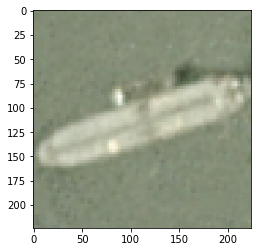

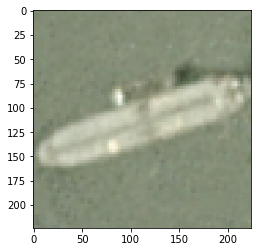

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


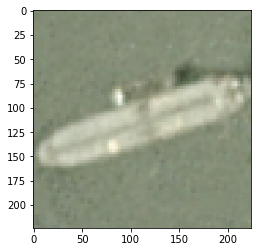

In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.python.keras.applications.imagenet_utils import decode_predictions


# assign the image path for the classification experiments
filename = 'data/shipsnet/1__20180712_211331_0f06__-118.20211036154986_33.73033961314171.png'
# 'C:\\Users\\dmitrytoda\\Documents\\kaggle\\ships'

# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

## Preprocess and make prediction
### VGG16

In [8]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# we will get top 5 predictions which is the default
label_vgg = decode_predictions(predictions)
# print VGG16 predictions
for prediction_id in range(len(label_vgg[0])):
    print(label_vgg[0][prediction_id])

('n02264363', 'lacewing', 0.36178502)
('n01930112', 'nematode', 0.12486691)
('n03920288', 'Petri_dish', 0.04777537)
('n01873310', 'platypus', 0.045148794)
('n04589890', 'window_screen', 0.03365547)


### ResNet50

In [9]:
processed_image = resnet50.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# we will get top 5 predictions which is the default
label_resnet = decode_predictions(predictions)
# print VGG16 predictions
for prediction_id in range(len(label_resnet[0])):
    print(label_resnet[0][prediction_id])

('n01930112', 'nematode', 0.74017334)
('n02264363', 'lacewing', 0.052829463)
('n04347754', 'submarine', 0.03723886)
('n01873310', 'platypus', 0.0348329)
('n01491361', 'tiger_shark', 0.018874707)
